### Cung cấp dữ liệu birthweight_reduced.csv
### Yêu cầu: Áp dụng Logistic Regression để thực hiện việc xác định trẻ có thiếu cân hay không dựa vào thông tin còn lại.
1. Hãy đọc dữ liệu từ tập tin này. Chuẩn hóa dữ liệu nếu cần.
2. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được với tỷ lệ dữ liệu test là 0.3
3. Áp dụng thuật toán Logistic Regression
4. Kiểm tra độ chính xác
5. Tìm kết quả Cho dữ liệu Test: X_now = [[12, 18, 4.5, 35, 1, 41, 7, 65, 125, 37, 14, 25, 68, 1,1]]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from pandas import DataFrame
from sklearn import preprocessing

In [2]:
# https://www.sheffield.ac.uk/mash/data
data = pd.read_csv("../../Data/birthweight_reduced.csv")

In [3]:
data.head()

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
0,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
1,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
2,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
3,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
4,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                42 non-null     int64  
 1   headcirumference  42 non-null     int64  
 2   length            42 non-null     int64  
 3   Birthweight       42 non-null     float64
 4   Gestation         42 non-null     int64  
 5   smoker            42 non-null     int64  
 6   motherage         42 non-null     int64  
 7   mnocig            42 non-null     int64  
 8   mheight           42 non-null     int64  
 9   mppwt             42 non-null     int64  
 10  fage              42 non-null     int64  
 11  fedyrs            42 non-null     int64  
 12  fnocig            42 non-null     int64  
 13  fheight           42 non-null     int64  
 14  lowbwt            42 non-null     int64  
 15  mage35            42 non-null     int64  
 16  LowBirthWeight    42 non-null     object 
dtyp

In [5]:
data.describe()

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,894.071429,13.261905,19.928571,7.264286,39.190476,0.523810,25.547619,9.428571,64.404762,125.857143,28.904762,13.666667,17.190476,70.761905,0.142857,0.095238
std,467.616186,0.766987,1.112958,1.329739,2.643336,0.505487,5.666342,12.511737,2.547687,15.879994,6.863866,2.160247,17.308165,2.843988,0.354169,0.297102
min,27.000000,12.000000,17.000000,4.200000,33.000000,0.000000,18.000000,0.000000,58.000000,99.000000,19.000000,10.000000,0.000000,66.000000,0.000000,0.000000
25%,537.250000,13.000000,19.000000,6.450000,38.000000,0.000000,20.250000,0.000000,63.000000,115.000000,23.000000,12.000000,0.000000,69.000000,0.000000,0.000000
50%,821.000000,13.000000,20.000000,7.250000,39.500000,1.000000,24.000000,4.500000,64.000000,125.000000,29.500000,14.000000,18.500000,71.000000,0.000000,0.000000
75%,1269.500000,14.000000,21.000000,8.000000,41.000000,1.000000,29.000000,15.750000,66.000000,135.000000,32.000000,16.000000,25.000000,72.000000,0.000000,0.000000
max,1764.000000,15.000000,22.000000,10.000000,45.000000,1.000000,41.000000,50.000000,71.000000,170.000000,46.000000,16.000000,50.000000,78.000000,1.000000,1.000000


In [6]:
X = data.iloc[:,1:-1]
X.head()

,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0
1,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0
2,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0
3,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1
4,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0


In [7]:
Y = data[['LowBirthWeight']]
Y.head()

,LowBirthWeight
0,Low
1,Low
2,Normal
3,Low
4,Low


In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
clf = LogisticRegression(solver='liblinear')

In [11]:
clf.fit(X_train,Y_train.values.ravel())

LogisticRegression(solver='liblinear')

In [12]:
clf.intercept_

array([-0.01524003])

In [13]:
feature_names = pd.Series(X_train.columns.values)
feature_names

0     headcirumference
1               length
2          Birthweight
3            Gestation
4               smoker
5            motherage
6               mnocig
7              mheight
8                mppwt
9                 fage
10              fedyrs
11              fnocig
12             fheight
13              lowbwt
14              mage35
dtype: object

In [14]:
coef = pd.Series(np.array(clf.coef_[0]))
coef

0     0.116379
1     0.414348
2     0.439060
3     0.750304
4    -0.046188
5    -0.232754
6     0.048167
7    -0.208785
8     0.196107
9     0.093000
10   -0.150472
11   -0.106640
12   -0.590045
13   -0.283676
14   -0.003836
dtype: float64

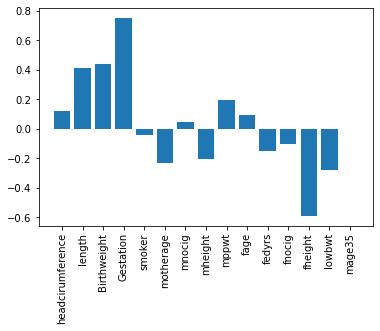

In [15]:
plt.bar(feature_names, coef)
plt.xticks(rotation='vertical')
plt.show()

In [16]:
Y_pred = clf.predict(X_test)
Y_pred

array(['Normal', 'Normal', 'Low', 'Low', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Low', 'Normal'],
      dtype=object)

In [17]:
from sklearn.metrics import accuracy_score
print("Accuracy is ", accuracy_score(Y_test,Y_pred)*100,"%")

Accuracy is  84.61538461538461 %


In [18]:
print('Training/ Score Scikit learn: ', clf.score(X_train,Y_train))

Training/ Score Scikit learn:  1.0


In [19]:
print('Testing/ Score Scikit learn: ', clf.score(X_test,Y_test))

Testing/ Score Scikit learn:  0.8461538461538461


* Nhận xét: R^2 của Training và Testing không chênh lệch nhiều, model không bị overfitting
* Dữ liệu cần được bổ sung thêm vì chỉ có 42 mẫu cho cả training và testing là khá ít

In [20]:
X_now = [[12, 18, 4.5, 35, 1, 41, 7, 65, 125, 37, 14, 25, 68, 1, 1]]
Y_now = clf.predict(X_now)
Y_now

array(['Low'], dtype=object)